In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [2]:

import matplotlib.pyplot as plt

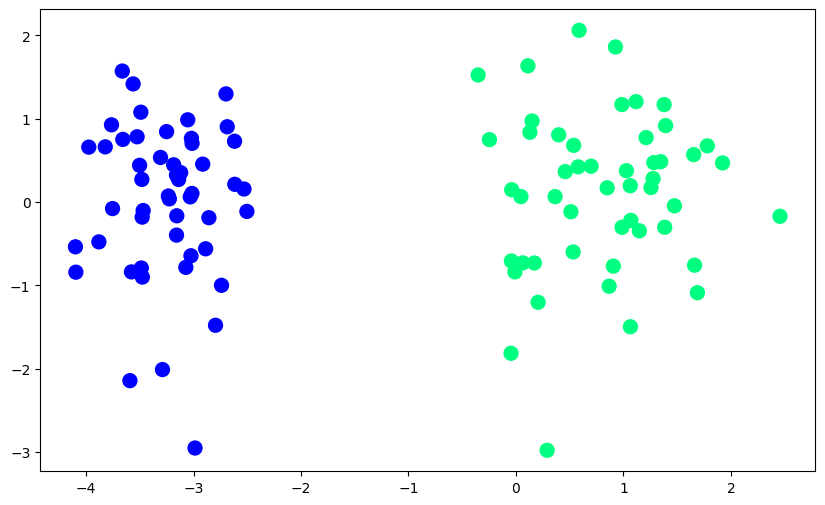

In [3]:

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [6]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

d:\Study\Machine Learning\Learning ML\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [7]:
print(lor.coef_)
print(lor.intercept_)

[[4.83163977 0.21925188]]
[5.82032585]


In [8]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [10]:

x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1

In [26]:
def gd(X,y):
    X = np.insert(X,0,1,axis=1)
    w = np.ones(X.shape[1])
    lr = 0.5
    epochs = 5000

    for i in range(epochs):
        y_hat = sigmoid(np.dot(X,w))
        w = w + lr*(np.dot((y-y_hat),X)/(X.shape[0]))

    return w[1:], w[0]

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [28]:
coef_, intercept_ = gd(X,y)

In [29]:
print(intercept_)
print(coef_)

5.83338864905325
[4.83926872 0.21182255]


In [30]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [31]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b

(-3.0, 2.0)

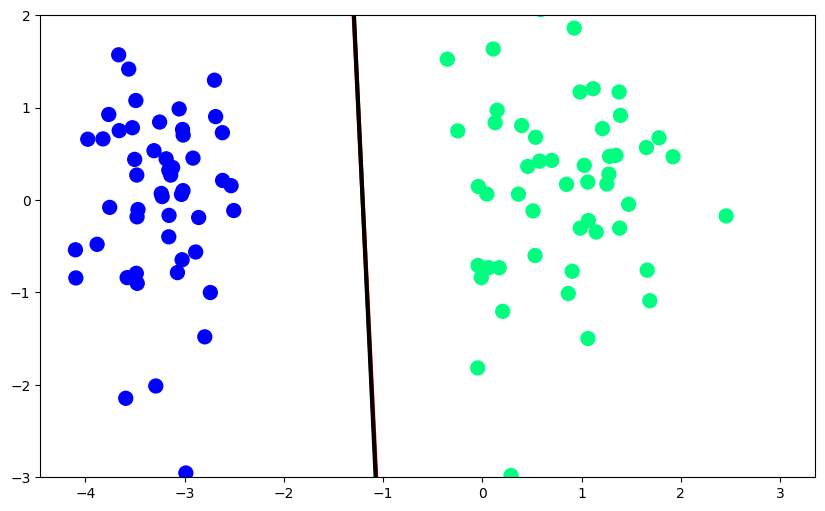

In [32]:
plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1,color='red',linewidth=3)
plt.plot(x_input2,y_input2,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)